

Integrantes Grupo 7:

Catalina Cretton

Osman Cornejo

Rodrigo Gutierrez

Jonathan Santander

Yasna Vega



#Evaluación 1 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
* Ejecución técnica de un procedimiento de  Análisis Exploratorio de datos
  * Deberá cargar los datos del CSV a pandas
  * Deberá identificar las columnas relevantes y realizar la unión de los datos
  * Deberá identificar las columnas más relevantes del negocio y proponer una rutina de limpieza
  * Separar la información entre las columnas relevantes y ejecutar su rutina de limpieza
  * Identificar la correlación de las columnas e identificar las más relevantes
  * Proponga 5 gráficos que otorguen valor a los datos y describa el conocimiento que puede extraer de éstos
---


# Contexto: 

Una empresa anónima, nos encargó la importante misión de predecir como serán sus próximas ventas basados en sus datos transaccionales. Para falicitar el proyecto de Análisis de Datos, nos proporcionó 3 datasets que necesitaremos relacionar para poder responder a la demanda de nuestro cliente. 
La primera fase de nuestro proyecto consistirá en un análisis exploratorio que nos permitirá conocer del negocio, saber qué venden, cuantos clientes manejan en sus sistemas, entre otras preguntas relevantes que nos permitirán plantear diversas hipótesis respecto de los datos. 

**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

In [ ]:
!wget https://www.dropbox.com/s/i9edv1p4ufk6apl/datos_ventas.csv
!wget https://www.dropbox.com/s/f2774ywx6a0vhwn/datos_clientes.csv
!wget https://www.dropbox.com/s/bk66vergl5vuofj/datos_trabajador.csv

--2022-07-29 01:29:19--  https://www.dropbox.com/s/i9edv1p4ufk6apl/datos_ventas.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i9edv1p4ufk6apl/datos_ventas.csv [following]
--2022-07-29 01:29:19--  https://www.dropbox.com/s/raw/i9edv1p4ufk6apl/datos_ventas.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8dad16620c559bbf75d02a746.dl.dropboxusercontent.com/cd/0/inline/Bp_dbpq_rMgCr8e-HraMQqOeOslkdVni_5hwnYTzRPjwibjhr3u9WnfBDXeoK6hJpSJq9WM-3jZiTJ8EVLHxZqFwBqorZhDDcYYELC8JAGZ-eGpsum7XDtxtoojgFWlyWfXPP1VQXLeTH2JVFQfMdWIaQS0O0qpjVZP_WUhYSZlAiQ/file# [following]
--2022-07-29 01:29:19--  https://ucb8dad16620c559bbf75d02a746.dl.dropboxusercontent.com/cd/0/inline/Bp_dbpq_rMgCr8e-HraMQqOeOslkdVni_5hwnYTzRPjwibjhr3u9WnfB

# Análisis Exploratorio de Datos

## Importar las librerias necesarias

In [ ]:
# Importacion de librerías
import pandas as pd
import numpy as np
import seaborn as sns

## Cargar fuentes de datos

In [ ]:
# Cargue los archivos CSV necesarios aquí
df_ventas = pd.read_csv("datos_ventas.csv", sep="|")
df_clientes= pd.read_csv('datos_clientes.csv')
df_trabajador= pd.read_csv('datos_trabajador.csv')

In [ ]:
# Realice análisis de los datos del CSV 1

In [ ]:
## Revisando el analisis de los datos de ventas, podemos identificar que los datos correponden a ventas de alimentos 
## contiene los datos de CAJERO_ID Y COMPRADOR_ID que nos permitira unir con las otras tablas
df_ventas.head(10)

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD
0,26,7,32,"22/08/19 19:43:18,000000000",Q.-1500.,7802215104855,Costa Rama,4,CONFITES-GALLETAS,"1,0"
1,49,7,91,"23/08/19 14:08:25,000000000",Q.4050-.,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
2,49,7,399,"23/08/19 14:08:25,000000000",Q.4050-.,7802575006035,CORBATAS CARO.400g.,1,OFERTAS ESPECIALES,"1,0"
3,49,7,92,"23/08/19 14:08:25,000000000",Q.4050-.,7801875032010,TÉ SUPREMO 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
4,49,7,177,"23/08/19 14:08:25,000000000",Q.4050-.,7808743601934,ACEITE MERKAT 900ml.,1,OFERTAS ESPECIALES,"1,0"
5,49,7,88,"23/08/19 14:08:25,000000000",Q.4050-.,41789001260,MARUCHAN CALI.VEGETAL 64g.,1,OFERTAS ESPECIALES,"1,0"
6,69,7,6,"23/08/19 21:14:38,000000000",Q.-1950.,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
7,81,7,142,"24/08/19 16:29:19,000000000",Q.-1200.,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
8,82,7,445,"24/08/19 16:31:33,000000000",Q.-2350.,7802575006035,CORBATAS CARO.400g.,1,OFERTAS ESPECIALES,"1,0"
9,82,7,156,"24/08/19 16:31:33,000000000",Q.-2350.,7805000314781,KETCHUP HELLMANN`S 850g.,1,OFERTAS ESPECIALES,"1,0"


¿Qué pasa con los datos de montos_total?

¿Estará reconociendo formato de fecha_venta en tipo date?

¿Corresponde que el gramaje/unidad esté dentro del nombre del producto o deberian estar en una columna aparte?


In [ ]:
## Visualizamos la información en estadística descriptiva, obteniendo el total de registros, el promedio, la variación o dispersión en los datos. 
## Sin embargo, para los datos entregados no podemos concluir la Std, debido a que los datos no aportan al modelo.
df_ventas.describe()

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,CODIGO_FAMILIA
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,4988.726184,3.828865,249.451797,4.426127
std,6754.533366,2.322299,145.613872,4.225431
min,26.000000,2.000000,1.000000,1.000000
25%,1311.000000,2.000000,123.000000,1.000000
50%,2817.000000,2.000000,246.000000,1.000000
75%,6065.000000,7.000000,378.000000,7.000000
max,62325.000000,7.000000,500.000000,13.000000


¿Por qué "describe" no genera los datos estadisticos para la columna  de Cantidad?

In [ ]:
## Obtenemos la cantidad de registro y columnas
df_ventas.shape

(1753, 10)

In [ ]:
## Evaluamos los tipos de obtenidos, para proponer el tipo de limpieza que debemos efectuar.
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VENTA_ID         1753 non-null   int64 
 1   CAJERO_ID        1753 non-null   int64 
 2   COMPRADOR_ID     1753 non-null   int64 
 3   FECHA_VENTA      1753 non-null   object
 4   MONTO_TOTAL      1753 non-null   object
 5   CODIGO_PRODUCTO  1753 non-null   object
 6   NOMBRE_PRODUCTO  1753 non-null   object
 7   CODIGO_FAMILIA   1753 non-null   int64 
 8   NOMBRE_FAMILIA   1753 non-null   object
 9   CANTIDAD         1753 non-null   object
dtypes: int64(4), object(6)
memory usage: 137.1+ KB


Obteniendo la información del tipo de dato, vemos que existen datos tipo Object que deben ser modificados.

In [ ]:
## Según la validación de los datos Nan podemos concluir que las bases no contienen datos nulos.
df_ventas.isnull().sum()

VENTA_ID           0
CAJERO_ID          0
COMPRADOR_ID       0
FECHA_VENTA        0
MONTO_TOTAL        0
CODIGO_PRODUCTO    0
NOMBRE_PRODUCTO    0
CODIGO_FAMILIA     0
NOMBRE_FAMILIA     0
CANTIDAD           0
dtype: int64

In [ ]:
# Realice análisis de los datos del CSV 2

In [ ]:
## ## Revisando el analisis de los datos de clientes, podemos identificar que los datos contienen información de los clientes, correo, cantidad de hijos, edad, entre otros. 
## contiene los datos de ID_cliente que nos permitira unir con las otras tablas
df_clientes.head(10)

,id_cliente,primer_nombre,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,Ibby,Plewes,Izac,iizac0@cnbc.com,Female,Lithuanian,Otro,1,1,RMA,Celeste
1,2,Doralia,Ewell,Townsend,dtownsend1@ow.ly,Female,Armenian,Viudo,2,2,IEX Total View,Azul
2,3,Lynette,Merrydew,Feaveryear,lfeaveryear2@aol.com,Female,Papiamento,Soltero,3,3,RMI,Celeste
3,4,Janaye,Jeffryes,Anglim,janglim3@ameblo.jp,Female,Georgian,Casado,4,4,MTP3,Azul
4,5,Travus,Divis,Minchindon,tminchindon4@sourceforge.net,Male,Northern Sotho,Casado,1,5,RMI,Amarrillo
5,6,Roseanne,Hollingshead,Nolder,rnolder5@theatlantic.com,Female,Tswana,Casado,2,6,uCOS,Otro
6,7,Hillier,Redihalgh,Rosas,hrosas6@gov.uk,Male,Afrikaans,Viudo,3,7,Application Architecture,Amarrillo
7,8,Vin,Trahear,Valasek,vvalasek7@businessweek.com,Male,Punjabi,Casado,4,8,SDL Trados,Azul
8,9,Hanny,Gostridge,Eldershaw,heldershaw8@netlog.com,Female,Armenian,Viudo,1,9,RV,Otro
9,10,Idalina,Yurtsev,McGill,imcgill9@people.com.cn,Female,Papiamento,Casado,2,10,RCMS,Rojo


En las columnas "Estado_civil" y "Color_F" contienen datos "Otros", ¿Estos datos corresponde a datos nulos?

¿A que se refiere la columna Color_F?

In [ ]:
## Visualizamos la información en estadística descriptiva, obteniendo el total de registros, el promedio, la variación o dispersión de la edad y cantidad de hijos
## Obtenemos los valores minimos y maximos por edad y cantidad de hijos, los datos ID no aportan al modelo
df_clientes.describe()

,id_cliente,cant_hijos,edad
count,500.000000,500.000000,500.000000
mean,250.500000,2.500000,32.100000
std,144.481833,1.119154,18.557445
min,1.000000,1.000000,1.000000
25%,125.750000,1.750000,16.000000
50%,250.500000,2.500000,32.000000
75%,375.250000,3.250000,48.000000
max,500.000000,4.000000,65.000000


In [ ]:
## Obtenemos la cantidad de registro y columnas
df_clientes.shape

(500, 12)

In [ ]:
## Evaluamos los tipos de obtenidos, para proponer el tipo de limpieza que debemos efectuar.
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_cliente        500 non-null    int64 
 1   primer_nombre     500 non-null    object
 2   apellido_paterno  500 non-null    object
 3   apellido_materno  500 non-null    object
 4   correo            500 non-null    object
 5   genero            500 non-null    object
 6   idioma            500 non-null    object
 7   estado_civil      500 non-null    object
 8   cant_hijos        500 non-null    int64 
 9   edad              500 non-null    int64 
 10  estudios          500 non-null    object
 11  Color_F           500 non-null    object
dtypes: int64(3), object(9)
memory usage: 47.0+ KB


In [ ]:
## Según la validación de los datos Nan podemos concluir que las bases no contienen datos nulos.
df_clientes.isnull().sum()

id_cliente          0
primer_nombre       0
apellido_paterno    0
apellido_materno    0
correo              0
genero              0
idioma              0
estado_civil        0
cant_hijos          0
edad                0
estudios            0
Color_F             0
dtype: int64

In [ ]:
# Realice análisis de los datos del CSV 3

In [ ]:
## Revisando el analisis de los datos de trabajadores
## contiene los datos de CAJERO_ID que nos permitira unir con las otras tablas
df_trabajador.head(10)

,ID,CAJERO_ID,NOMBRE,APELLIDO,RUT
0,1,2,Zelda,Wiggins,23730488-8
1,2,3,Kaye,Bird,18659842-3
2,3,4,Sean,Tucker,12534101-2
3,4,5,Ulric,Lester,14004608-6
4,5,7,Hunter,Booth,13030165-7


In [ ]:
## Visualizamos la información en estadística descriptiva, obteniendo el total de trabajadores. Sin embargo, los datos ID no aportan al modelo.
df_trabajador.describe()

,ID,CAJERO_ID
count,5.000000,5.000000
mean,3.000000,4.200000
std,1.581139,1.923538
min,1.000000,2.000000
25%,2.000000,3.000000
50%,3.000000,4.000000
75%,4.000000,5.000000
max,5.000000,7.000000


In [ ]:
## Se miden las dimensiones de la muestra de datos de ventas
## Obtenemos la cantidad de registro y columnas
df_trabajador.shape

(5, 5)

In [ ]:
## Observamos los tipos de datos de las columnas para verificar que tipo de dato tiene cada columna, para proponer el tipo de limpieza que debemos efectuar.
df_trabajador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   CAJERO_ID  5 non-null      int64 
 2   NOMBRE     5 non-null      object
 3   APELLIDO   5 non-null      object
 4   RUT        5 non-null      object
dtypes: int64(2), object(3)
memory usage: 328.0+ bytes


In [ ]:
## Según la validación de los datos Nan podemos concluir que las bases no contienen datos nulos.
df_trabajador.isnull().sum()

ID           0
CAJERO_ID    0
NOMBRE       0
APELLIDO     0
RUT          0
dtype: int64

## Unir los CSV

In [ ]:
## De acuerdo al analisis de las tablas de Clientes, Ventas y trabajador hicimos la union entre las tablas desde el campos "ID"
df_consolidado = df_ventas.merge(df_clientes, left_on="COMPRADOR_ID", right_on="id_cliente").merge(df_trabajador, left_on="CAJERO_ID", right_on="CAJERO_ID")
df_consolidado.columns

Index(['VENTA_ID', 'CAJERO_ID', 'COMPRADOR_ID', 'FECHA_VENTA', 'MONTO_TOTAL',
       'CODIGO_PRODUCTO', 'NOMBRE_PRODUCTO', 'CODIGO_FAMILIA',
       'NOMBRE_FAMILIA', 'CANTIDAD', 'id_cliente', 'primer_nombre',
       'apellido_paterno', 'apellido_materno', 'correo', 'genero', 'idioma',
       'estado_civil', 'cant_hijos', 'edad', 'estudios', 'Color_F', 'ID',
       'NOMBRE', 'APELLIDO', 'RUT'],
      dtype='object')

## Analice los datos unidos, identifique columnas a limpiar y columnas a remover en caso de ser necesario. Justifique todas sus propuestas.

Columnas a limpiar

1.   MONTO_TOTAL (object): Se debe modificar el tipo de dato a numerico y hacer limpieza, es un dato relevante que permite obtener el Monto gastado por cliente y la venta efectuada
2.   FECHA_VENTA (object): Se debe modificar el tipo de dato a date, permitiendos obtener por ejemplo los dias con mayor venta o dias trabajados
3. ESTADO_CIVIL: Convertir los datos "Otros" a Nan, nos permite identificar la cantidad de datos, para evaluar si son eliminados o se reemplazan. 
4. CANTIDAD: Se debe modificar tipo de dato del campo a float64, debido a que existe una cantidad vendida en decimales. 

Columnas a remover

1. NOMBRE, APELLIDO,	RUT  del trabajador estas columnas son removidas, debido a que no aportan al modelo
2. primer_nombre, apellido_paterno, apellido_materno, correo de la base de clientes estas columnas son removidas, debido a que no aportan al modelo 

In [ ]:
# Análisis de los datos aquí

# Propuesta de limpieza


## Proponga al menos 3 tareas de limpieza

Escríbalas acá justificando el por qué se debe realizar cada limpieza. 
En los bloques posteriores, ejecute las rutinas propuestas.

Utilizamos el metodo DROP, para remover las columnas que no aportan valor, para simplificar el dataframe.

In [ ]:
# Ejecución de limpieza 1 
df_consolidado.drop(columns=['NOMBRE', 'APELLIDO', 'RUT','primer_nombre', 'apellido_paterno', 'apellido_materno', 'correo', 'ID'], inplace=True)
df_consolidado.columns

Index(['VENTA_ID', 'CAJERO_ID', 'COMPRADOR_ID', 'FECHA_VENTA', 'MONTO_TOTAL',
       'CODIGO_PRODUCTO', 'NOMBRE_PRODUCTO', 'CODIGO_FAMILIA',
       'NOMBRE_FAMILIA', 'CANTIDAD', 'id_cliente', 'genero', 'idioma',
       'estado_civil', 'cant_hijos', 'edad', 'estudios', 'Color_F'],
      dtype='object')

In [ ]:
# Ejecución de limpieza 2 
import re
df_consolidado['MONTO_TOTAL'] = df_consolidado['MONTO_TOTAL'].apply(lambda x : float((re.sub(r"[Q\-\.]", "",x).replace(',','.'))))
df_consolidado['MONTO_TOTAL'].head()

0    1500.0
1    4050.0
2    7750.0
3    9270.0
4    3200.0
Name: MONTO_TOTAL, dtype: float64

La columna cantidad no puede ser modificada a Float ya que posee "," en vez de ".", por lo que se debio reemplazar estos valores para obtener la transformación requerida

In [ ]:
# Ejecución de limpieza 3 
df_consolidado['CANTIDAD'] = df_consolidado['CANTIDAD'].apply(lambda x : float(x.replace(',','.'))) 

In [ ]:
df_consolidado['FECHA_VENTA'] =   pd.to_datetime(df_consolidado['FECHA_VENTA'])   

In [ ]:
df_consolidado['FECHA_VENTA'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1748    2019
1749    2019
1750    2019
1751    2019
1752    2019
Name: FECHA_VENTA, Length: 1753, dtype: int64

In [ ]:
def transformar_genero(genero):
  if genero == 'Female': 
    return 1
  elif genero == 'Male':
    return 2
  else: 
    return 3 

In [ ]:
df_consolidado['genero_num'] = df_consolidado['genero'].apply(transformar_genero) 

In [ ]:
def transformar_estado(estado):
  if estado == 'Soltero': 
    return 1
  elif estado == 'Casado':
    return 2
  elif estado == 'Viudo':
    return 3
  else: 
    return 4

In [ ]:
df_consolidado['estado_num'] = df_consolidado['estado_civil'].apply(transformar_estado) 

In [ ]:
def transformar_colores(color):
  if color == 'Amarrillo': 
    return 1
  elif color == 'Azul':
    return 2
  elif color == 'Celeste':
    return 3
  elif color == 'Morado':
    return 4
  elif color == 'Rojo':
    return 5
  elif color == 'Verde':
    return 6
  else: 
    return 7




In [ ]:
df_consolidado['color_num'] = df_consolidado['Color_F'].apply(transformar_colores)

In [ ]:
def transformar_edad(edad):
  if edad <= 18: 
    return 1
  elif edad > 18 and edad<=35:
    return 2
  elif edad > 35 and edad<=65:
    return 3
  else: 
    return 4

In [ ]:
df_consolidado['rango_edad'] = df_consolidado['edad'].apply(transformar_edad)

In [ ]:
def transformar_monto(monto):
  if monto <= 1000: 
    return 1
  elif monto > 1000 and monto<=2000:
    return 2
  elif monto > 2000 and monto<=3000:
    return 3
  elif monto > 3000 and monto<=4000:
    return 4
  elif monto > 4000 and monto<=5000:
    return 5
  elif monto > 5000 and monto<=10000:
    return 6
  else: 
    return 7

In [ ]:
df_consolidado['rango_monto'] = df_consolidado['MONTO_TOTAL'].apply(transformar_monto)

In [ ]:
def transformar_qhijos(qhijos):
  if qhijos <= 2: 
    return 1
  elif qhijos > 2 and qhijos<=4:
    return 2
  else: 
    return 3

In [ ]:
df_consolidado['q_hijos'] = df_consolidado['cant_hijos'].apply(transformar_qhijos)

In [ ]:
df_consolidado['mes'] =   df_consolidado['FECHA_VENTA'].dt.month

In [ ]:
df_consolidado['dia_semana'] =   df_consolidado['FECHA_VENTA'].dt.weekday

In [ ]:
df_consolidado['hora'] =   df_consolidado['FECHA_VENTA'].dt.hour

In [ ]:
## df_consolidado=df_consolidado[df_consolidado["NOMBRE_PRODUCTO"].str.contains("\*")==False]


In [ ]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VENTA_ID         1753 non-null   int64         
 1   CAJERO_ID        1753 non-null   int64         
 2   COMPRADOR_ID     1753 non-null   int64         
 3   FECHA_VENTA      1753 non-null   datetime64[ns]
 4   MONTO_TOTAL      1753 non-null   float64       
 5   CODIGO_PRODUCTO  1753 non-null   object        
 6   NOMBRE_PRODUCTO  1753 non-null   object        
 7   CODIGO_FAMILIA   1753 non-null   int64         
 8   NOMBRE_FAMILIA   1753 non-null   object        
 9   CANTIDAD         1753 non-null   float64       
 10  id_cliente       1753 non-null   int64         
 11  genero           1753 non-null   object        
 12  idioma           1753 non-null   object        
 13  estado_civil     1753 non-null   object        
 14  cant_hijos       1753 non-null   int64  

In [ ]:
# Si necesita ejecutar más, agregue los bloques necesarios

## Identificación de correlación en las columnas

In [ ]:
# Identifique las correlación aquí
df_consolidado.corr()

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,MONTO_TOTAL,CODIGO_FAMILIA,CANTIDAD,id_cliente,cant_hijos,edad,genero_num,estado_num,color_num,rango_edad,rango_monto,q_hijos,mes,dia_semana,hora
VENTA_ID,1.000000,-0.064596,0.004816,-0.005159,0.019244,0.018927,0.004816,0.019208,0.014861,-0.009682,0.006789,-0.027831,0.030090,-0.010979,0.008521,0.507185,-0.100195,-0.099709
CAJERO_ID,-0.064596,1.000000,-0.024050,-0.093382,-0.009142,-0.024600,-0.024050,-0.040094,-0.020302,0.000711,0.025237,0.023691,-0.021115,-0.116862,-0.046050,0.147075,0.067794,-0.638259
COMPRADOR_ID,0.004816,-0.024050,1.000000,-0.005721,0.010355,-0.022475,1.000000,-0.021344,0.062183,0.084421,-0.044836,-0.055665,0.070894,-0.001097,-0.027982,0.019315,-0.026673,-0.040977
MONTO_TOTAL,-0.005159,-0.093382,-0.005721,1.000000,0.022831,-0.000666,-0.005721,0.007227,0.023846,0.014149,-0.026164,-0.017194,0.016791,0.856873,0.021738,-0.006365,-0.001974,0.108494
CODIGO_FAMILIA,0.019244,-0.009142,0.010355,0.022831,1.000000,-0.156154,0.010355,0.025782,0.026050,-0.031108,0.027285,-0.021940,0.036943,0.034092,0.035841,-0.002898,0.004086,-0.077031
CANTIDAD,0.018927,-0.024600,-0.022475,-0.000666,-0.156154,1.000000,-0.022475,0.017738,-0.005478,-0.014501,-0.001822,-0.008737,0.008214,-0.016490,0.033301,0.067014,-0.017883,0.027057
id_cliente,0.004816,-0.024050,1.000000,-0.005721,0.010355,-0.022475,1.000000,-0.021344,0.062183,0.084421,-0.044836,-0.055665,0.070894,-0.001097,-0.027982,0.019315,-0.026673,-0.040977
cant_hijos,0.019208,-0.040094,-0.021344,0.007227,0.025782,0.017738,-0.021344,1.000000,0.014100,0.034680,0.015179,0.020824,0.014657,0.022319,0.895334,0.017229,0.003945,0.031338
edad,0.014861,-0.020302,0.062183,0.023846,0.026050,-0.005478,0.062183,0.014100,1.000000,-0.024076,-0.023222,-0.067098,0.928863,0.034750,0.017819,-0.002507,0.004472,0.001882
genero_num,-0.009682,0.000711,0.084421,0.014149,-0.031108,-0.014501,0.084421,0.034680,-0.024076,1.000000,-0.039448,-0.026822,-0.016298,0.038363,0.044069,-0.024424,0.028483,-0.003798


In [ ]:
resultado_df =df_consolidado

corr_df = resultado_df.corr(method='pearson')



corr_df.style.background_gradient(cmap='coolwarm')

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,MONTO_TOTAL,CODIGO_FAMILIA,CANTIDAD,id_cliente,cant_hijos,edad,genero_num,estado_num,color_num,rango_edad,rango_monto,q_hijos,mes,dia_semana,hora
VENTA_ID,1.000000,-0.064596,0.004816,-0.005159,0.019244,0.018927,0.004816,0.019208,0.014861,-0.009682,0.006789,-0.027831,0.030090,-0.010979,0.008521,0.507185,-0.100195,-0.099709
CAJERO_ID,-0.064596,1.000000,-0.024050,-0.093382,-0.009142,-0.024600,-0.024050,-0.040094,-0.020302,0.000711,0.025237,0.023691,-0.021115,-0.116862,-0.046050,0.147075,0.067794,-0.638259
COMPRADOR_ID,0.004816,-0.024050,1.000000,-0.005721,0.010355,-0.022475,1.000000,-0.021344,0.062183,0.084421,-0.044836,-0.055665,0.070894,-0.001097,-0.027982,0.019315,-0.026673,-0.040977
MONTO_TOTAL,-0.005159,-0.093382,-0.005721,1.000000,0.022831,-0.000666,-0.005721,0.007227,0.023846,0.014149,-0.026164,-0.017194,0.016791,0.856873,0.021738,-0.006365,-0.001974,0.108494
CODIGO_FAMILIA,0.019244,-0.009142,0.010355,0.022831,1.000000,-0.156154,0.010355,0.025782,0.026050,-0.031108,0.027285,-0.021940,0.036943,0.034092,0.035841,-0.002898,0.004086,-0.077031
CANTIDAD,0.018927,-0.024600,-0.022475,-0.000666,-0.156154,1.000000,-0.022475,0.017738,-0.005478,-0.014501,-0.001822,-0.008737,0.008214,-0.016490,0.033301,0.067014,-0.017883,0.027057
id_cliente,0.004816,-0.024050,1.000000,-0.005721,0.010355,-0.022475,1.000000,-0.021344,0.062183,0.084421,-0.044836,-0.055665,0.070894,-0.001097,-0.027982,0.019315,-0.026673,-0.040977
cant_hijos,0.019208,-0.040094,-0.021344,0.007227,0.025782,0.017738,-0.021344,1.000000,0.014100,0.034680,0.015179,0.020824,0.014657,0.022319,0.895334,0.017229,0.003945,0.031338
edad,0.014861,-0.020302,0.062183,0.023846,0.026050,-0.005478,0.062183,0.014100,1.000000,-0.024076,-0.023222,-0.067098,0.928863,0.034750,0.017819,-0.002507,0.004472,0.001882
genero_num,-0.009682,0.000711,0.084421,0.014149,-0.031108,-0.014501,0.084421,0.034680,-0.024076,1.000000,-0.039448,-0.026822,-0.016298,0.038363,0.044069,-0.024424,0.028483,-0.003798


## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

De acuerdo  al analisis de la correlación, esta nos entrega resultados cercanos a 0 en todas las variables evaluadas, por lo que no encontramos relaciones suficientemente buenas para implementar un modelo de Machine learning

## Proponga y describa al menos 5 gráficos que entregan valor al negocio y a la interpretación de los datos

# Gráfico 1

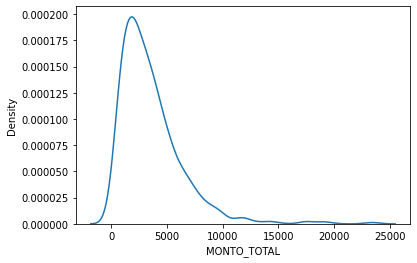

In [ ]:
# Programe el gráfico 1
from seaborn import kdeplot
kdeplot(df_consolidado.MONTO_TOTAL)

Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.

#  Este grafico presenta la concentración los montos totales de venta, estan entre 0 y 5.000

# Gráfico 2

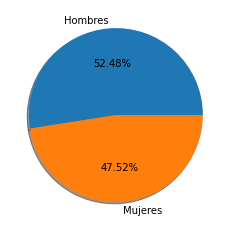

In [ ]:
# Programe el gráfico 2
import matplotlib.pyplot as plt
sizes = df_consolidado['genero'].value_counts()

fig , ax = plt.subplots()

ax.pie(sizes,labels = ['Hombres','Mujeres'],autopct='%1.2f%%',shadow = True)

plt.show();

Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.

# Este grafico presenta la distribución de genero por compras realizadas

# Gráfico 3

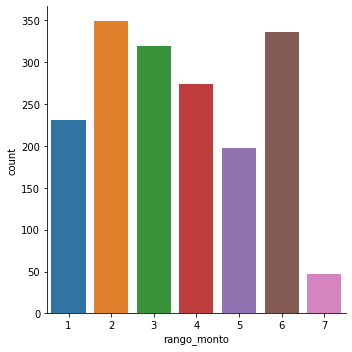

In [ ]:
# Programe el gráfico 3
sns.catplot(x='rango_monto',data=df_consolidado,kind = 'count');

**Rangos de monto total**

 1. menor o igual a 1000
 2. Entre 1000 y monto 2000
 3. Entre 2000 y monto 3000
 4. Entre 3000 y monto 4000
 5. Entre 4000 y monto 5000
 6. Entre 5000 y monto 10000
 7. Mayor que 10000

Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.
# El grafico presenta el rango de monto de venta que mas frecuente, siendo este el monto entre 1.000 y 2.000

# Gráfico 4

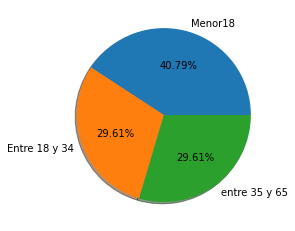

In [ ]:
# Programe el gráfico 4
sizes = df_consolidado['rango_edad'].value_counts()
fig , ax = plt.subplots()
ax.pie(sizes,labels = ['Menor18','Entre 18 y 34','entre 35 y 65'],autopct='%1.2f%%',shadow = True)
plt.show();

Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.

# Este grafico presenta la distribución por rango de edad de las compras realizadas

# Detalle aquí las conclusiones obtenidas respecto al dataset. Explique y complemente el análisis recalcando la importancia de la exploración de datos antes de comenzar a realizar modelos de Machine Learning.

# En primer lugar es de suma importancia entender que representan los datos con los que estamos trabajando y si estos se encuentran con el formato correspondiente para comenzar un analisis estadistico. 
#Posterior a la limpieza y las transformaciones realizadas, aplicamos tecnicas y metodos correpondientes para obtener la correlación entre las distintas variables. 
# En conclusión respecto a los resultados obtenidos no son satisfactorios para aplicar un modelo de Machine learning.
# De todas formas el dataset puede ser explorado con mayor profundidad para descubrir la existencia de mejores correlaciones que permitan la aplicacion de un modelo de Machine Learning. 


